In [16]:
import pandas as pd
import json
import numpy as np


## Prepare

In [17]:
checkin_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_checkin.json"
business_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json"
review_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_review.json"
tip_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_tip.json"
user_path="/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/project/Yelp-JSON/Yelp JSON/yelp_dataset/yelp_academic_dataset_user.json"


In [18]:
'''
with open(checkin_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

checkin = pd.DataFrame(data)'''
with open(business_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

business = pd.DataFrame(data)
with open(review_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

review = pd.DataFrame(data)
'''
with open(tip_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

tip = pd.DataFrame(data)
with open(user_path, "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]

user = pd.DataFrame(data)
'''

'\nwith open(tip_path, "r", encoding="utf-8") as f:\n    data = [json.loads(line) for line in f]\n\ntip = pd.DataFrame(data)\nwith open(user_path, "r", encoding="utf-8") as f:\n    data = [json.loads(line) for line in f]\n\nuser = pd.DataFrame(data)\n'

In [19]:
business_filtered = business[business["city"] == "Sparks"]
business_ids = business_filtered["business_id"]

filtered_reviews = review[review["business_id"].isin(business_ids)]
print(filtered_reviews.shape)

(73033, 9)


### Remove users/business with low number of reviews

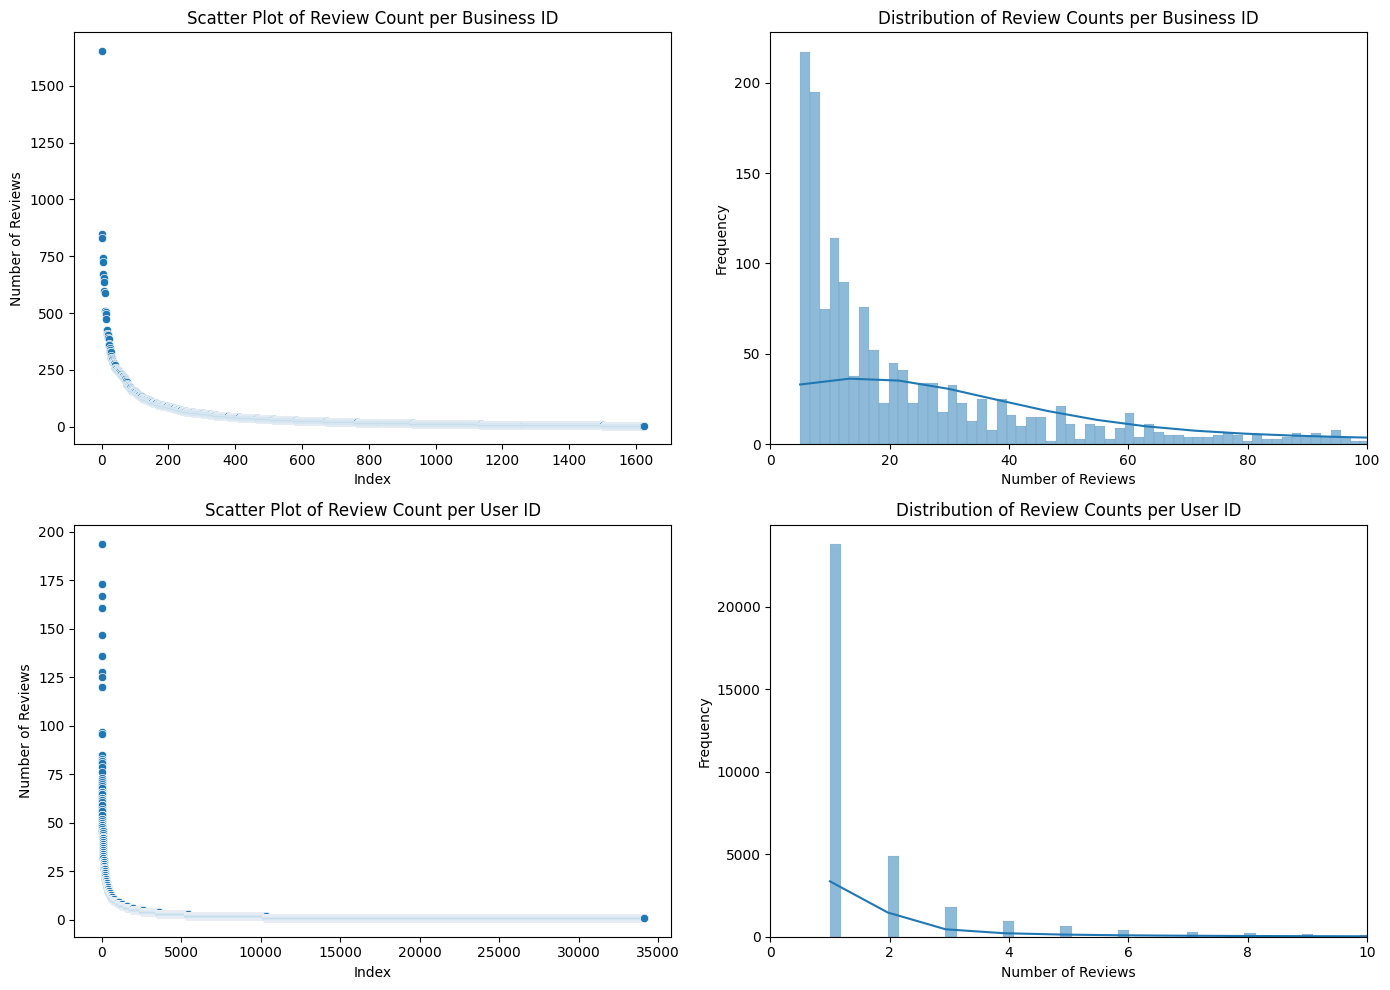

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of reviews per 'business_id' and 'user_id'
business_reviews = filtered_reviews['business_id'].value_counts().reset_index()
business_reviews.columns = ['business_id', 'review_count']

user_reviews = filtered_reviews['user_id'].value_counts().reset_index()
user_reviews.columns = ['user_id', 'review_count']

# Set up figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for 'business_id'
sns.scatterplot(x=business_reviews.index, y=business_reviews['review_count'], ax=axes[0, 0])
axes[0, 0].set_title("Scatter Plot of Review Count per Business ID")
axes[0, 0].set_xlabel("Index")
axes[0, 0].set_ylabel("Number of Reviews")

# Histogram for 'business_id' review distribution
sns.histplot(business_reviews['review_count'], bins=1000, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Review Counts per Business ID")
axes[0, 1].set_xlabel("Number of Reviews")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlim(0, 100) 

# Scatter plot for 'user_id'
sns.scatterplot(x=user_reviews.index, y=user_reviews['review_count'], ax=axes[1, 0])
axes[1, 0].set_title("Scatter Plot of Review Count per User ID")
axes[1, 0].set_xlabel("Index")
axes[1, 0].set_ylabel("Number of Reviews")

# Histogram for 'user_id' review distribution
sns.histplot(user_reviews['review_count'], bins=1000, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Review Counts per User ID")
axes[1, 1].set_xlabel("Number of Reviews")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_xlim(0, 10) 

# Adjust layout
plt.tight_layout()
plt.show()


In [21]:
# Define thresholds (adjust as needed)
business_threshold = 5  # Minimum number of reviews a business must have
user_threshold = 2  # Minimum number of reviews a user must have

# Count reviews per business and user
business_counts = filtered_reviews['business_id'].value_counts()
user_counts = filtered_reviews['user_id'].value_counts()

# Filter out businesses and users with low review counts
filtered_reviews = filtered_reviews[
    (filtered_reviews['business_id'].isin(business_counts[business_counts >= business_threshold].index)) &
    (filtered_reviews['user_id'].isin(user_counts[user_counts >= user_threshold].index))
]

# Display the filtered DataFrame
print(filtered_reviews.shape)


(49266, 9)


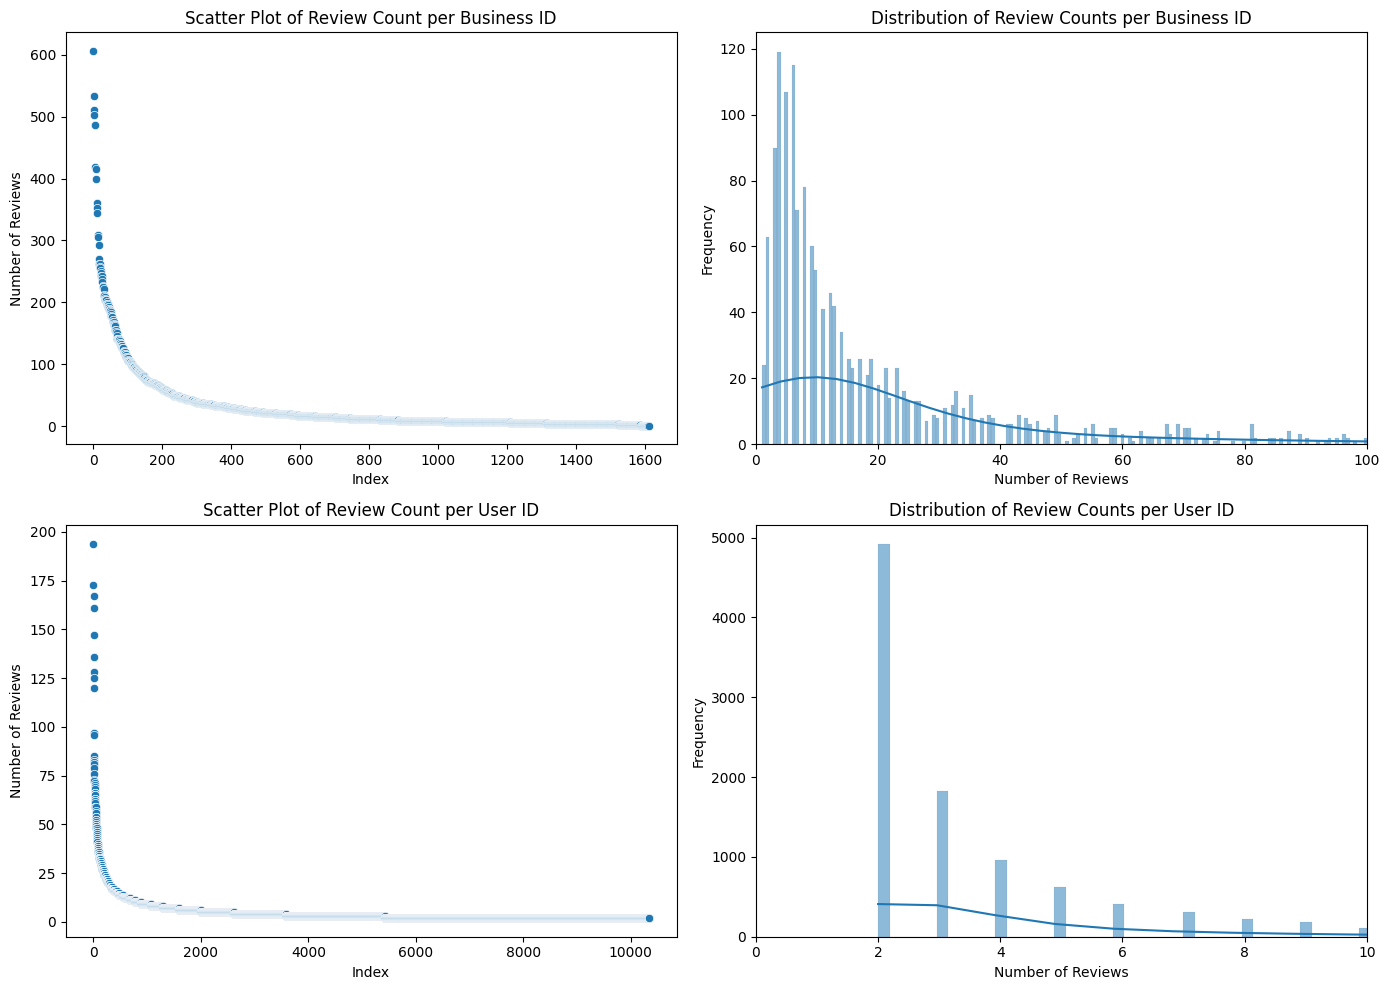

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of reviews per 'business_id' and 'user_id'
business_reviews = filtered_reviews['business_id'].value_counts().reset_index()
business_reviews.columns = ['business_id', 'review_count']

user_reviews = filtered_reviews['user_id'].value_counts().reset_index()
user_reviews.columns = ['user_id', 'review_count']

# Set up figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot for 'business_id'
sns.scatterplot(x=business_reviews.index, y=business_reviews['review_count'], ax=axes[0, 0])
axes[0, 0].set_title("Scatter Plot of Review Count per Business ID")
axes[0, 0].set_xlabel("Index")
axes[0, 0].set_ylabel("Number of Reviews")

# Histogram for 'business_id' review distribution
sns.histplot(business_reviews['review_count'], bins=1000, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Review Counts per Business ID")
axes[0, 1].set_xlabel("Number of Reviews")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_xlim(0, 100) 

# Scatter plot for 'user_id'
sns.scatterplot(x=user_reviews.index, y=user_reviews['review_count'], ax=axes[1, 0])
axes[1, 0].set_title("Scatter Plot of Review Count per User ID")
axes[1, 0].set_xlabel("Index")
axes[1, 0].set_ylabel("Number of Reviews")

# Histogram for 'user_id' review distribution
sns.histplot(user_reviews['review_count'], bins=1000, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Review Counts per User ID")
axes[1, 1].set_xlabel("Number of Reviews")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_xlim(0, 10) 

# Adjust layout
plt.tight_layout()
plt.show()


In [23]:
review_short= filtered_reviews.drop(columns=["review_id","business_id","date"])
review_short

,user_id,stars,useful,funny,cool,text
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,3,1,1,So I no longer go here which is a shame becaus...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,0,0,1,Best pizza ever... hands down.\n\nLove the pee...
463,CePuKN0wwl5CW-58rkt3-w,5.0,0,0,0,I love these guys. Tony is one of big help. Ha...
558,9wymgENHBBOm9Tlx7xHy7A,2.0,0,0,0,I didn't really like my sandwich I got here. I...
592,p0tP-O8y7rhJKd1iFirgwQ,5.0,0,0,0,This is a must get when you come to Reno is Ye...
...,...,...,...,...,...,...
6989039,bVTkQjIcrMVn6XYHljPJKQ,1.0,0,2,0,There are so many issues with this place. \n\n...
6989046,tago9IWKWZuVprSGwFiAUw,4.0,1,0,2,"Stopped by here to look for anime figurines,th..."
6989104,od3LplN8Cz_CemZdg9HENg,1.0,1,0,0,"So I googled ""passport photos near me"", Sparks..."
6989359,sGMB4rFamgxbFOKAmiJ0mg,4.0,7,3,7,So in the last couple of years we have had hor...


### Lowecasing

In [24]:
review_lower=review_short
review_lower["text"]=review_lower["text"].str.lower()
review_lower

,user_id,stars,useful,funny,cool,text
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,3,1,1,so i no longer go here which is a shame becaus...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,0,0,1,best pizza ever... hands down.\n\nlove the pee...
463,CePuKN0wwl5CW-58rkt3-w,5.0,0,0,0,i love these guys. tony is one of big help. ha...
558,9wymgENHBBOm9Tlx7xHy7A,2.0,0,0,0,i didn't really like my sandwich i got here. i...
592,p0tP-O8y7rhJKd1iFirgwQ,5.0,0,0,0,this is a must get when you come to reno is ye...
...,...,...,...,...,...,...
6989039,bVTkQjIcrMVn6XYHljPJKQ,1.0,0,2,0,there are so many issues with this place. \n\n...
6989046,tago9IWKWZuVprSGwFiAUw,4.0,1,0,2,"stopped by here to look for anime figurines,th..."
6989104,od3LplN8Cz_CemZdg9HENg,1.0,1,0,0,"so i googled ""passport photos near me"", sparks..."
6989359,sGMB4rFamgxbFOKAmiJ0mg,4.0,7,3,7,so in the last couple of years we have had hor...


In [25]:
corpus=review_lower.drop(columns=["useful","funny","cool"])

### First Cleaning


In [26]:
import string

corpus["text"] = corpus["text"].apply(lambda text: text.replace("\n", "").replace("...", ""))
corpus["text"] = corpus["text"].apply(lambda text: ''.join([char for char in text if char not in string.punctuation]))


### Lemmatization

In [27]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [28]:
corpus

,user_id,stars,text
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...
463,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...
558,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...
592,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...
...,...,...,...
6989039,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for s...
6989046,tago9IWKWZuVprSGwFiAUw,4.0,stopped by here to look for anime figurinesthi...
6989104,od3LplN8Cz_CemZdg9HENg,1.0,so i googled passport photos near me sparks up...
6989359,sGMB4rFamgxbFOKAmiJ0mg,4.0,so in the last couple of years we have had hor...


In [29]:
corpus['words'] = None
for index, sample in corpus.iterrows():
    list_words = [] 
    sent = nlp(sample.text)
    
    for token in sent:
        list_words.append(token.lemma_)
    
    corpus.at[index, "words"] = list_words 


In [30]:
corpus

,user_id,stars,text,words
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"[so, I, no, long, go, here, which, be, a, sham..."
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"[good, pizza, ever, hand, downlove, the, peep,..."
463,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"[I, love, these, guy, tony, be, one, of, big, ..."
558,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...,"[I, do, not, really, like, my, sandwich, I, ge..."
592,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...,"[this, be, a, must, get, when, you, come, to, ..."
...,...,...,...,...
6989039,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for s...,"[there, be, so, many, issue, with, this, place..."
6989046,tago9IWKWZuVprSGwFiAUw,4.0,stopped by here to look for anime figurinesthi...,"[stop, by, here, to, look, for, anime, figurin..."
6989104,od3LplN8Cz_CemZdg9HENg,1.0,so i googled passport photos near me sparks up...,"[so, I, google, passport, photo, near, I, spar..."
6989359,sGMB4rFamgxbFOKAmiJ0mg,4.0,so in the last couple of years we have had hor...,"[so, in, the, last, couple, of, year, we, have..."


### Remove stopWords

In [31]:
import nltk
import ast  # Para convertir strings en listas
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

corpus["words"] = corpus["words"].apply(lambda x: [word for word in x if word.lower() not in stop_words and not word.isdigit()])

# Limpiar directamente la columna 'words' eliminando signos de puntuación y saltos de línea

[nltk_data] Downloading package stopwords to /home/jaume/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Remove foreing reviews

In [32]:
import pandas as pd
import nltk
from nltk.corpus import words

# Dowload english
nltk.download("words")
english_vocab = set(words.words())

# count words that are not in english
def count_non_english_words(word_list):
    return sum(1 for word in word_list if word.lower() not in english_vocab)

# Filtrar corpus
corpus["non_english_count"] = corpus["words"].apply(count_non_english_words)


pd.set_option('display.max_colwidth', None)  # Show full text without truncation
corpus


[nltk_data] Downloading package words to /home/jaume/nltk_data...
[nltk_data]   Package words is already up-to-date!


,user_id,stars,text,words,non_english_count
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame because the eyebrow waxing here is fantastic i am giving this 2 stars because when i have contacted for an appointment via the phone it usually has taken days for me to get a response the online booking is useless because i rarely have found appointments within 2 weeks of when i need it and im very flexible with time of day i give up on this place unless you book out weeks in advance you will not get an appointment im now paying 10 more elsewhere which sucks but im able to get seen when i need to be seen,"[long, go, shame, eyebrow, wax, fantastic, give, star, contact, appointment, via, phone, usually, take, day, get, response, online, booking, useless, rarely, find, appointment, within, week, need, flexible, time, day, give, place, unless, book, week, advance, get, appointment, pay, elsewhere, suck, able, get, see, need, see]",1
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps running the place former hockey player ask him to pop his nose and adorable but tough as nails wife very funnythey make their own sausage and mozzarella here and god help you if you mispronounce ricottaany of the pizzas are fab we even eat the crusts which is a rarity in our family just dab it in the olive oil and mayb ask for some of their viniagrette to dip too,"[good, pizza, ever, hand, downlove, peep, run, place, , former, hockey, player, ask, pop, nose, adorable, tough, nail, wife, funnythey, make, sausage, mozzarella, , god, help, mispronounce, ricottaany, pizza, fab, even, eat, crust, , rarity, family, , dab, olive, oil, mayb, ask, viniagrette, dip]",11
463,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had flat tire and he got it fixed less that what his estimation expectation thank you,"[love, guy, tony, one, big, help, flat, tire, get, fix, less, estimation, expectation, thank]",0
558,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i got the jalapeño cheese bread and it was tasteless and dry i could tell it was old also i got tomatoes and cucumbers which were mush because they were overripe usually theyre a lot better than this but today wasnt it the staff is very friendly though,"[really, like, sandwich, get, get, jalapeño, cheese, bread, tasteless, dry, could, tell, old, also, get, tomato, cucumber, mush, overripe, usually, lot, well, today, staff, friendly, though]",1
592,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is yellow subs ask for the sprouts on your sub and you wont regret it it is way better then anywhere ive ever been the people are totally down to earth and always are nice and stack your sub with only the best only the best and i recommend this to anyone who loves subs and loves food oh and there tank tops and tshirts priceless i have a tank myself and represent it anywhere i go will be going there again in the future 5 stars because the service was fast people were nice food was amazing seating made you feel closer to your peers with more conversation movement back and forth and a great environment,"[must, get, come, reno, yellow, sub, ask, sprout, sub, regret, way, well, , anywhere, ever, people, totally, earth, always, nice, stack, sub, good, good, recommend, anyone, love, sub, love, food, oh, tank, top, tshirt, priceless, tank, represent, anywhere, go, go, future, star, service, fast, people, nice, food, amazing, seating, make, feel, close, peer, conversation, movement, back, forth, great, environment]",3
...,...,...,...,...,...
6989039,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for starters the drinks can be crazy overpriced and all the hard alcohol is warm the security is a total joke there was a night when capacity was hit and they put a biker gang in charge of security they were only letting in their biker friends just ignoring most of the people in line and worst of all the dj where do i begin s

In [33]:
pd.reset_option('display.max_colwidth')

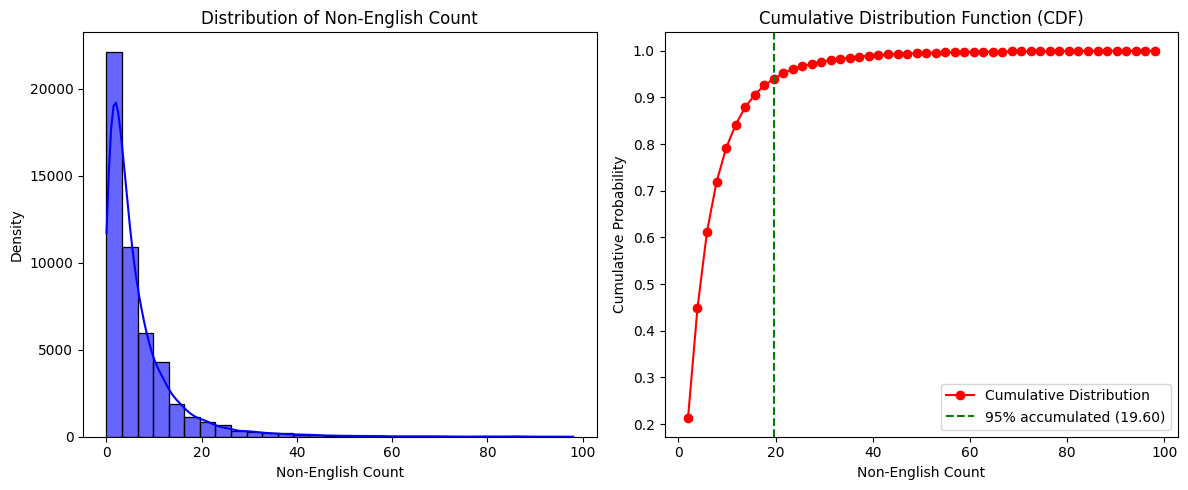

The value where 95% of the data accumulates is approximately 19.60


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter values up to 50
filtered_values = corpus["non_english_count"][corpus["non_english_count"] <= 100]

# Compute histogram and cumulative distribution
counts, bin_edges = np.histogram(filtered_values, bins=50, density=True)
cdf = np.cumsum(counts) / np.sum(counts)  # Normalize

# Find the threshold where 95% of the data accumulates
threshold_index = np.argmax(cdf >= 0.95)
threshold_value = bin_edges[threshold_index]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Histogram (distribution)
sns.histplot(filtered_values, bins=30, kde=True, ax=axes[0], color="blue", alpha=0.6)
axes[0].set_xlabel("Non-English Count")
axes[0].set_ylabel("Density")
axes[0].set_title("Distribution of Non-English Count")

# Right plot: Cumulative Distribution Function (CDF)
axes[1].plot(bin_edges[1:], cdf, color="red", marker="o", linestyle="-", label="Cumulative Distribution")
axes[1].axvline(threshold_value, color="green", linestyle="--", label=f"95% accumulated ({threshold_value:.2f})")
axes[1].set_xlabel("Non-English Count")
axes[1].set_ylabel("Cumulative Probability")
axes[1].set_title("Cumulative Distribution Function (CDF)")
axes[1].legend()

plt.tight_layout()
plt.show()

# Print the threshold value
print(f"The value where 95% of the data accumulates is approximately {threshold_value:.2f}")


In [35]:
corpus = corpus[
    (corpus["non_english_count"] <= threshold_value) &  # If the number or foreign words is higher than the threshold we set
    (corpus["non_english_count"] <= corpus["words"].apply(len) * 0.5)  # we remove the sample if a high percentage of the text is not in english
]


### Common words

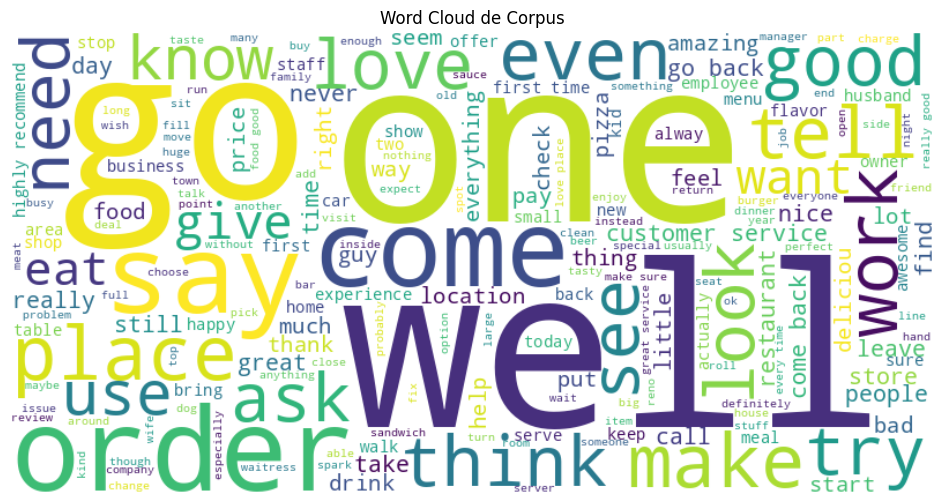

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aplanar la lista de listas y unir palabras en un solo string
flat_words = [word for sublist in corpus["words"] for word in sublist]
text = " ".join(flat_words)

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Graficar el WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.title("Word Cloud de Corpus")
plt.show()


In [37]:
irrelevant_words=["well","tell","one","say","think","come","look","even","make","really","ask","use","see","want","go","order","good","work","place","need"]

In [38]:
corpus["words"] = corpus["words"].apply(lambda sublist: [word for word in sublist if word not in irrelevant_words])
corpus["words"] = corpus["words"].apply(lambda sublist: [word for word in sublist if word.strip()])


/tmp/ipykernel_1734588/2305863366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["words"] = corpus["words"].apply(lambda sublist: [word for word in sublist if word not in irrelevant_words])
/tmp/ipykernel_1734588/2305863366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["words"] = corpus["words"].apply(lambda sublist: [word for word in sublist if word.strip()])


In [39]:
corpus['words_join'] = None
corpus.loc[:, "words_join"] = corpus["words"].apply(lambda x: " ".join([word for word in x if word]))

/tmp/ipykernel_1734588/1659496537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['words_join'] = None


In [40]:
corpus=corpus.drop(columns="non_english_count")

In [41]:
corpus

,user_id,stars,text,words,words_join
281,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"[long, shame, eyebrow, wax, fantastic, give, s...",long shame eyebrow wax fantastic give star con...
421,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"[pizza, ever, hand, downlove, peep, run, forme...",pizza ever hand downlove peep run former hocke...
463,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"[love, guy, tony, big, help, flat, tire, get, ...",love guy tony big help flat tire get fix less ...
558,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...,"[like, sandwich, get, get, jalapeño, cheese, b...",like sandwich get get jalapeño cheese bread ta...
592,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...,"[must, get, reno, yellow, sub, sprout, sub, re...",must get reno yellow sub sprout sub regret way...
...,...,...,...,...,...
6989039,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for s...,"[many, issue, starter, drink, crazy, overprice...",many issue starter drink crazy overprice hard ...
6989046,tago9IWKWZuVprSGwFiAUw,4.0,stopped by here to look for anime figurinesthi...,"[stop, anime, figurinesthis, clean, insidelimi...",stop anime figurinesthis clean insidelimite pa...
6989104,od3LplN8Cz_CemZdg9HENg,1.0,so i googled passport photos near me sparks up...,"[google, passport, photo, near, spark, store, ...",google passport photo near spark store website...
6989359,sGMB4rFamgxbFOKAmiJ0mg,4.0,so in the last couple of years we have had hor...,"[last, couple, year, horrible, experience, sup...",last couple year horrible experience super laz...


### Save cleaned corpus

In [42]:
corpus.to_csv('lemma.csv', index=False, encoding='utf-8')

## READ

In [72]:
import pandas as pd
corpus = pd.read_csv('lemma.csv', encoding='utf-8')

### VADER POLARITY

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus["text"])

print(X.shape)

(46260, 65342)


In [74]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [75]:
y_pred = []
for rev in corpus["text"]:
    y_pred.append(1 if analyzer.polarity_scores(rev)['compound'] > 0 else 0)

In [76]:
corpus["vader"]= y_pred
corpus["text"][corpus["vader"]==0]

0        so i no longer go here which is a shame becaus...
17       horrible old cigarette smelly even tho we requ...
21       i ordered the chicken enchiladas and was rathe...
26       first time turkey meal buyer absolutely disgus...
29       tacos burritos french fries and milk shakes wh...
                               ...                        
46240    we came here during an apparent trilingual ser...
46242    rude staff over priced pizza i watched them tr...
46250    im not a person to leave a bad review but i wi...
46251    went a few times to deal with my asthma and al...
46252    if we could give it no stars at all we would w...
Name: text, Length: 8405, dtype: object

In [77]:
corpus

,user_id,stars,text,words,words_join,vader
0,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"['long', 'shame', 'eyebrow', 'wax', 'fantastic...",long shame eyebrow wax fantastic give star con...,0
1,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"['pizza', 'ever', 'hand', 'downlove', 'peep', ...",pizza ever hand downlove peep run former hocke...,1
2,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"['love', 'guy', 'tony', 'big', 'help', 'flat',...",love guy tony big help flat tire get fix less ...,1
3,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...,"['like', 'sandwich', 'get', 'get', 'jalapeño',...",like sandwich get get jalapeño cheese bread ta...,1
4,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...,"['must', 'get', 'reno', 'yellow', 'sub', 'spro...",must get reno yellow sub sprout sub regret way...,1
...,...,...,...,...,...,...
46255,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for s...,"['many', 'issue', 'starter', 'drink', 'crazy',...",many issue starter drink crazy overprice hard ...,1
46256,tago9IWKWZuVprSGwFiAUw,4.0,stopped by here to look for anime figurinesthi...,"['stop', 'anime', 'figurinesthis', 'clean', 'i...",stop anime figurinesthis clean insidelimite pa...,1
46257,od3LplN8Cz_CemZdg9HENg,1.0,so i googled passport photos near me sparks up...,"['google', 'passport', 'photo', 'near', 'spark...",google passport photo near spark store website...,1
46258,sGMB4rFamgxbFOKAmiJ0mg,4.0,so in the last couple of years we have had hor...,"['last', 'couple', 'year', 'horrible', 'experi...",last couple year horrible experience super laz...,1


## LDA

In [78]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
num_batches = 7
n_topics = 9
batches = np.array_split(corpus, num_batches)


/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [79]:
from collections import Counter

# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [80]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        print(temp_vector_sum)
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
        
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)  # Simply store the word as-is
        top_words.append(" ".join(topic_words))         
    return top_words

In [81]:
num_batches

7


Procesando Batch 1/7...
<class 'list'>
<class 'list'>
['long', 'shame', 'eyebrow', 'wax', 'fantastic', 'give', 'star', 'contact', 'appointment', 'via', 'phone', 'usually', 'take', 'day', 'get', 'response', 'online', 'booking', 'useless', 'rarely', 'find', 'appointment', 'within', 'week', 'flexible', 'time', 'day', 'give', 'unless', 'book', 'week', 'advance', 'get', 'appointment', 'pay', 'elsewhere', 'suck', 'able', 'get']

Procesando Batch 2/7...
<class 'list'>
<class 'list'>
['long', 'shame', 'eyebrow', 'wax', 'fantastic', 'give', 'star', 'contact', 'appointment', 'via', 'phone', 'usually', 'take', 'day', 'get', 'response', 'online', 'booking', 'useless', 'rarely', 'find', 'appointment', 'within', 'week', 'flexible', 'time', 'day', 'give', 'unless', 'book', 'week', 'advance', 'get', 'appointment', 'pay', 'elsewhere', 'suck', 'able', 'get']

Procesando Batch 3/7...
<class 'list'>
<class 'list'>
['long', 'shame', 'eyebrow', 'wax', 'fantastic', 'give', 'star', 'contact', 'appointment', 

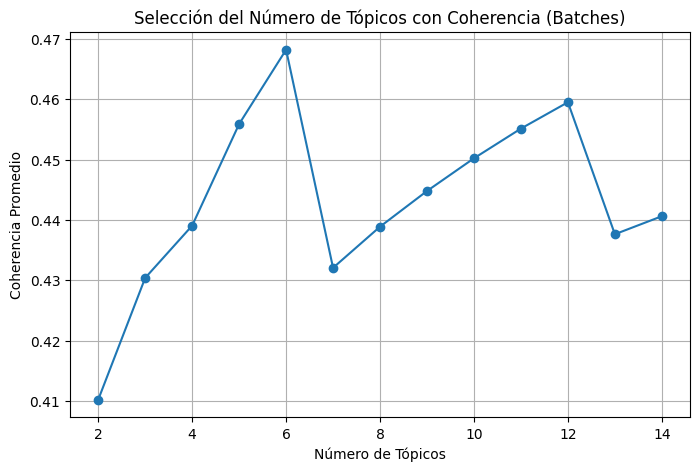

In [82]:

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import numpy as np
# Suponiendo que tienes un DataFrame con una columna "words"
df_corpus = corpus


# Dividir en batches correctamente
num_batches = 7
df_batches = np.array_split(df_corpus, num_batches)  # Dividir el DataFrame en partes

# Rango de número de tópicos a probar
topic_range = range(2, 15)
coherence_values = np.zeros(len(topic_range))  # Acumular coherencia

# Procesar cada batch
for batch_idx, batch_df in enumerate(df_batches):
    print(f"\nProcesando Batch {batch_idx+1}/{num_batches}...")

    # Convertir la columna "words" a lista de listas
    batch_texts = corpus["words"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x).tolist()

    # Crear diccionario y corpus para este batch
    dictionary = corpora.Dictionary(batch_texts)
    corpus2 = [dictionary.doc2bow(text) for text in batch_texts]

    # Calcular coherencia para cada número de tópicos
    for i, num_topics in enumerate(topic_range):
        lda_model = gensim.models.LdaModel(corpus=corpus2, id2word=dictionary, num_topics=num_topics, random_state=42)
        coherence_model = CoherenceModel(model=lda_model, texts=batch_texts, dictionary=dictionary, coherence='c_v')
        coherence_values[i] += coherence_model.get_coherence()  # Sumar coherencia del batch

# Promediar los valores de coherencia
coherence_values /= num_batches  

# Graficar coherencia vs. número de tópicos
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Número de Tópicos")
plt.ylabel("Coherencia Promedio")
plt.title("Selección del Número de Tópicos con Coherencia (Batches)")
plt.grid()
plt.show()

In [83]:
corpus

,user_id,stars,text,words,words_join,vader
0,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"['long', 'shame', 'eyebrow', 'wax', 'fantastic...",long shame eyebrow wax fantastic give star con...,0
1,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"['pizza', 'ever', 'hand', 'downlove', 'peep', ...",pizza ever hand downlove peep run former hocke...,1
2,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"['love', 'guy', 'tony', 'big', 'help', 'flat',...",love guy tony big help flat tire get fix less ...,1
3,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...,"['like', 'sandwich', 'get', 'get', 'jalapeño',...",like sandwich get get jalapeño cheese bread ta...,1
4,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...,"['must', 'get', 'reno', 'yellow', 'sub', 'spro...",must get reno yellow sub sprout sub regret way...,1
...,...,...,...,...,...,...
46255,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for s...,"['many', 'issue', 'starter', 'drink', 'crazy',...",many issue starter drink crazy overprice hard ...,1
46256,tago9IWKWZuVprSGwFiAUw,4.0,stopped by here to look for anime figurinesthi...,"['stop', 'anime', 'figurinesthis', 'clean', 'i...",stop anime figurinesthis clean insidelimite pa...,1
46257,od3LplN8Cz_CemZdg9HENg,1.0,so i googled passport photos near me sparks up...,"['google', 'passport', 'photo', 'near', 'spark...",google passport photo near spark store website...,1
46258,sGMB4rFamgxbFOKAmiJ0mg,4.0,so in the last couple of years we have had hor...,"['last', 'couple', 'year', 'horrible', 'experi...",last couple year horrible experience super laz...,1


In [84]:

n_topics = np.argmax(coherence_values)+2
num_batches=1
batches = np.array_split(corpus, num_batches)


/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [126]:
n_topics=12

In [127]:
batches[0]

,user_id,stars,text,words,words_join,vader
0,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"['long', 'shame', 'eyebrow', 'wax', 'fantastic...",long shame eyebrow wax fantastic give star con...,0
1,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"['pizza', 'ever', 'hand', 'downlove', 'peep', ...",pizza ever hand downlove peep run former hocke...,1
2,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"['love', 'guy', 'tony', 'big', 'help', 'flat',...",love guy tony big help flat tire get fix less ...,1
3,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...,"['like', 'sandwich', 'get', 'get', 'jalapeño',...",like sandwich get get jalapeño cheese bread ta...,1
4,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...,"['must', 'get', 'reno', 'yellow', 'sub', 'spro...",must get reno yellow sub sprout sub regret way...,1
...,...,...,...,...,...,...
46255,bVTkQjIcrMVn6XYHljPJKQ,1.0,there are so many issues with this place for s...,"['many', 'issue', 'starter', 'drink', 'crazy',...",many issue starter drink crazy overprice hard ...,1
46256,tago9IWKWZuVprSGwFiAUw,4.0,stopped by here to look for anime figurinesthi...,"['stop', 'anime', 'figurinesthis', 'clean', 'i...",stop anime figurinesthis clean insidelimite pa...,1
46257,od3LplN8Cz_CemZdg9HENg,1.0,so i googled passport photos near me sparks up...,"['google', 'passport', 'photo', 'near', 'spark...",google passport photo near spark store website...,1
46258,sGMB4rFamgxbFOKAmiJ0mg,4.0,so in the last couple of years we have had hor...,"['last', 'couple', 'year', 'horrible', 'experi...",last couple year horrible experience super laz...,1


In [143]:
# Store topic distributions
all_topic_matrices = []

for batch_idx, batch in enumerate(batches):
    print(f"\nProcessing Batch {batch_idx+1}/{num_batches}...\n")
    
    # Feature extraction
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(batch["words_join"].to_numpy())

    # LDA model
    lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
    lda_topic_matrix = lda_model.fit_transform(X)

    # Store the topic distributions
    all_topic_matrices.append(pd.DataFrame(lda_topic_matrix))

    # Get topic distribution (for visualization)
    lda_keys = get_keys(lda_topic_matrix)
    lda_categories, lda_counts = keys_to_counts(lda_keys)
    top_n_words_lda = get_top_n_words(20, lda_keys, X, vectorizer)

    # Print results
    for i in range(len(top_n_words_lda)):
        print(f"Topic {i+1}: {top_n_words_lda[i]}")

# Combine all topic matrices
df_topics = pd.concat(all_topic_matrices, ignore_index=True)



Processing Batch 1/1...

  (0, 23044)	1
  (0, 33147)	1
  (0, 31916)	1
  (0, 8669)	1
  (0, 16058)	1
  (0, 23043)	1
  (0, 7877)	2
  (0, 7946)	1
  (0, 13793)	1
  (0, 41236)	1
  (0, 12976)	3
  (0, 27090)	2
  (0, 43424)	1
  (0, 6219)	1
  (0, 6218)	2
  (0, 18324)	1
  (0, 44989)	1
  (0, 46511)	1
  (0, 37273)	1
  (0, 37387)	1
  (0, 4667)	1
  (0, 11037)	1
  (0, 13475)	1
  (0, 24926)	1
  (0, 15957)	1
  :	:
  (0, 17600)	1
  (0, 31142)	1
  (0, 47223)	1
  (0, 37803)	1
  (0, 39549)	1
  (0, 48461)	1
  (0, 37701)	1
  (0, 22217)	1
  (0, 39579)	1
  (0, 44330)	2
  (0, 44824)	2
  (0, 16671)	1
  (0, 16626)	1
  (0, 29669)	1
  (0, 9156)	1
  (0, 45120)	1
  (0, 20692)	1
  (0, 46336)	1
  (0, 33565)	1
  (0, 44217)	1
  (0, 36369)	1
  (0, 50292)	1
  (0, 27430)	1
  (0, 12142)	1
  (0, 25939)	1
  (0, 14988)	1
  (0, 3258)	1
  (0, 25297)	1
  (0, 30628)	1
  (0, 53147)	1
  (0, 7676)	1
  (0, 16194)	1
  (0, 6399)	1
  (0, 37732)	1
  (0, 35224)	1
  (0, 47000)	1
  (0, 44616)	2
  (0, 30535)	1
  (0, 29432)	2
  (0, 47326)	1
  (

In [144]:
for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  nail massage get great amazing salon pedicure relax hot love nice feel eyebrow stone back foot job facial wax brow
Topic 2:  great food get service time love bar beer drink nice always table back like wait staff friendly seat take night
Topic 3:  get customer back service pay give charge take business manager never would like car location card time try review wash
Topic 4:  store cake love shop great price dog get selection like product local quality always friendly staff food lot pet doughnut
Topic 5:  pizza get like sauce food chicken fry cheese time salad great try back wing would also eat service take love
Topic 6:  food get great time service like try always back eat love restaurant would chicken friendly also delicious take staff price
Topic 7:  car shop get service donut wash tow take repair oil vehicle wheel truck new great know replace like air also
Topic 8:  recommend great job highly price service professional time new fast repair friendly excellent honest fair get

In [145]:
from collections import Counter

# Asegurar que cada tópico es una lista de palabras
top_n_words_lda = [topic.split() for topic in top_n_words_lda]  # <- Agregar esta línea si necesario

# Contar palabras en todos los tópicos
word_counts = Counter(word for topic in top_n_words_lda for word in topic)

# Filtrar palabras que aparecen en más de un tópico
repeated_words = {word for word, count in word_counts.items() if count > 2}

# Crear una copia de top_n_words_lda sin palabras repetidas
filtered_top_n_words_lda = [
    [word for word in topic if word not in repeated_words]
    for topic in top_n_words_lda
]

# Mostrar palabras repetidas
print("Palabras repetidas en múltiples tópicos:", repeated_words)

# Mostrar los nuevos tópicos sin palabras repetidas
for i, topic in enumerate(filtered_top_n_words_lda, 1):
    print(f"Tópico {i}:", topic)


Palabras repetidas en múltiples tópicos: {'time', 'nice', 'like', 'new', 'food', 'service', 'would', 'love', 'store', 'get', 'staff', 'always', 'price', 'great', 'friendly', 'try', 'customer', 'also', 'take', 'back'}
Tópico 1: ['nail', 'massage', 'amazing', 'salon', 'pedicure', 'relax', 'hot', 'feel', 'eyebrow', 'stone', 'foot', 'job', 'facial', 'wax', 'brow']
Tópico 2: ['bar', 'beer', 'drink', 'table', 'wait', 'seat', 'night']
Tópico 3: ['pay', 'give', 'charge', 'business', 'manager', 'never', 'car', 'location', 'card', 'review', 'wash']
Tópico 4: ['cake', 'shop', 'dog', 'selection', 'product', 'local', 'quality', 'lot', 'pet', 'doughnut']
Tópico 5: ['pizza', 'sauce', 'chicken', 'fry', 'cheese', 'salad', 'wing', 'eat']
Tópico 6: ['eat', 'restaurant', 'chicken', 'delicious']
Tópico 7: ['car', 'shop', 'donut', 'wash', 'tow', 'repair', 'oil', 'vehicle', 'wheel', 'truck', 'know', 'replace', 'air']
Tópico 8: ['recommend', 'job', 'highly', 'professional', 'fast', 'repair', 'excellent', 'hon

In [146]:
filtered_top_n_words_lda = [topic for topic in filtered_top_n_words_lda if topic]  


In [147]:
#filtered_top_n_words_lda=top_n_words_lda

In [148]:
filtered_top_n_words_lda = [
    [word for word in topic if word not in {"movie", "teather"}]
    for topic in filtered_top_n_words_lda
]


## Visualization

In [149]:
# add the topics to this dataset as 8 new columns
df_topics.columns = ['topic_{}'.format(i) for i in range(n_topics)]

# Combine with the original dataset
dataset_f = pd.concat([corpus, df_topics], axis=1)
dataset_f.head()


,user_id,stars,text,words,words_join,vader,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11
0,1PJ-RjMqXHeymSkLRzuIdA,2.0,so i no longer go here which is a shame becaus...,"['long', 'shame', 'eyebrow', 'wax', 'fantastic...",long shame eyebrow wax fantastic give star con...,0,0.052109,0.002083,0.482487,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.002083,0.446654
1,Bcwv94u7FgNCpCoJLmSsaA,5.0,best pizza ever hands downlove the peeps runni...,"['pizza', 'ever', 'hand', 'downlove', 'peep', ...",pizza ever hand downlove peep run former hocke...,1,0.030953,0.002381,0.002381,0.002381,0.300473,0.002381,0.030951,0.002381,0.002381,0.002381,0.559720,0.061237
2,CePuKN0wwl5CW-58rkt3-w,5.0,i love these guys tony is one of big help had ...,"['love', 'guy', 'tony', 'big', 'help', 'flat',...",love guy tony big help flat tire get fix less ...,1,0.005952,0.005953,0.005952,0.005952,0.527943,0.005953,0.005952,0.005952,0.005953,0.005952,0.005953,0.412532
3,9wymgENHBBOm9Tlx7xHy7A,2.0,i didnt really like my sandwich i got here i g...,"['like', 'sandwich', 'get', 'get', 'jalapeño',...",like sandwich get get jalapeño cheese bread ta...,1,0.003472,0.003472,0.276905,0.003472,0.242741,0.449104,0.003472,0.003472,0.003472,0.003472,0.003472,0.003472
4,p0tP-O8y7rhJKd1iFirgwQ,5.0,this is a must get when you come to reno is ye...,"['must', 'get', 'reno', 'yellow', 'sub', 'spro...",must get reno yellow sub sprout sub regret way...,1,0.001634,0.663459,0.001634,0.001634,0.001634,0.320200,0.001634,0.001634,0.001634,0.001634,0.001634,0.001634


In [150]:
dataset_f.to_csv('topics.csv', index=False, encoding='utf-8')

In [151]:
type(corpus["words"])


pandas.core.series.Series

In [152]:
# Convertir a lista de listas
sentences = corpus["words"].tolist()
type(sentences)

list

In [153]:
def preprocess(sentence):
    # Remove punctuation
    sentence = ''.join([char for char in sentence if char not in string.punctuation])
    # Split into words
    words = sentence.split()
    return words

# Apply the preprocessing to your sentences
preprocessed_sentences = [preprocess(sentence) for sentence in sentences]


In [154]:
from gensim.models import Word2Vec

model = Word2Vec(preprocessed_sentences, 
                 vector_size=100,  # Dimensión de los embeddings
                 window=5,         # Contexto de palabras
                 min_count=1,      # Ignora palabras con menos de 2 apariciones
                 workers=4,        # Paralelización
                 sg=1)             # Skip-gram (sg=1) o CBOW (sg=0)

print(list(model.wv.index_to_key))  # Muestra algunas palabras del vocabulario


['get', 'food', 'time', 'great', 'service', 'like', 'back', 'would', 'take', 'try', 'always', 'love', 'give', 'also', 'friendly', 'wait', 'staff', 'could', 'price', 'nice', 'call', 'never', 'know', 'customer', 'day', 'eat', 'find', 'pizza', 'new', 'first', 'people', 'year', 'restaurant', 'recommend', 'little', 'experience', 'bad', 'minute', 'thing', 'store', 'chicken', 'clean', 'much', 'definitely', 'way', 'location', 'two', 'right', 'amazing', 'still', 'feel', 'leave', 'delicious', 'lot', 'sure', 'everything', 'drink', 'area', 'every', 'long', 'table', 'hour', 'pretty', 'home', 'star', 'check', 'since', 'fry', 'menu', 'ever', 'another', 'around', 'fresh', 'review', 'walk', 'last', 'car', 'help', 'business', 'next', 'sauce', 'super', 'favorite', 'pay', 'guy', 'taste', 'spark', 'seem', 'job', 'happy', 'care', 'thank', 'bring', 'shop', 'reno', 'visit', 'keep', 'many', 'something', 'bar', 'small', 'flavor', 'family', 'enjoy', 'night', 'week', 'hot', 'meal', 'big', 'open', 'lunch', 'sit', 

In [159]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random

def reduce_dimensions(model, num_dimensions=2, words=[]):
    vectors = []
    labels = []
    
    if not words:
        words = model.wv.index_to_key

    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)

    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=5)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

def plot_words_by_topic(vectors, labels, topics):
    plt.figure(figsize=(10, 8))

    # Crear una paleta de colores con suficientes colores únicos
    num_topics = len(topics)
    cmap = plt.cm.get_cmap("tab20", num_topics)  # Hasta 20 colores únicos

    topic_colors = {i: cmap(i) for i in range(num_topics)}

    word_to_topic = {}  # Diccionario para mapear palabra -> tópico
    for topic_idx, words in enumerate(topics):
        for word in words:
            word_to_topic[word] = topic_idx

    for i, label in enumerate(labels):
        x, y = vectors[i]
        topic_idx = word_to_topic.get(label, -1)
        color = topic_colors.get(topic_idx, "gray")  # Gris si el tópico no se encuentra
        plt.scatter(x, y, color=color, alpha=0.7)
        plt.text(x + 0.1, y + 0.1, label, fontsize=9, color=color)

    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.title("Visualización de palabras por tópico con t-SNE")
    plt.show()



In [160]:
print(list(model.wv.index_to_key)[:20])  # Muestra algunas palabras del vocabulario


['get', 'food', 'time', 'great', 'service', 'like', 'back', 'would', 'take', 'try', 'always', 'love', 'give', 'also', 'friendly', 'wait', 'staff', 'could', 'price', 'nice']


/tmp/ipykernel_1734588/3542063869.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", num_topics)  # Hasta 20 colores únicos


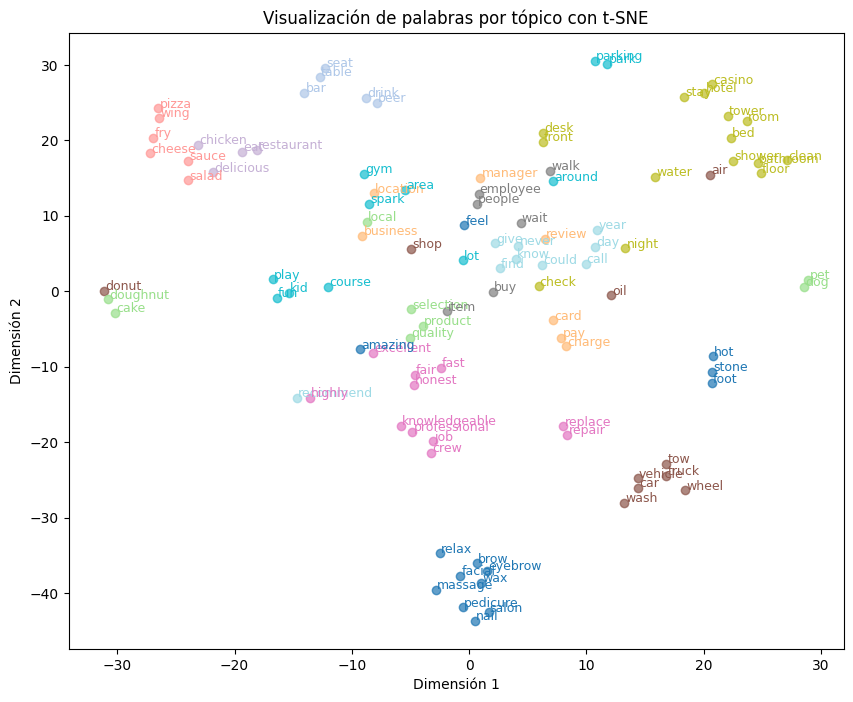

In [161]:
# Extraer palabras únicas de filtered_top_n_words_lda
words_to_plot = list(set(word for topic in filtered_top_n_words_lda for word in topic))

# Reducir dimensionalidad
vectors_2d, labels = reduce_dimensions(model, num_dimensions=2, words=words_to_plot)

# Graficar con colores por tópico
plot_words_by_topic(vectors_2d, labels, filtered_top_n_words_lda)

In [158]:
from scipy.spatial.distance import euclidean
import numpy as np

# Obtener todos los vectores de palabras en los tópicos
word_vectors = {
    word: model.wv[word]
    for topic in filtered_top_n_words_lda
    for word in topic
    if word in model.wv
}

# Lista de palabras con vector disponible
word_list = list(word_vectors.keys())

# Calcular distancias entre todos los pares de palabras en los tópicos
distances = []
for topic in filtered_top_n_words_lda:
    topic_vectors = [word_vectors[word] for word in topic if word in word_vectors]
    for i in range(len(topic_vectors)):
        for j in range(i + 1, len(topic_vectors)):
            distances.append(euclidean(topic_vectors[i], topic_vectors[j]))

# Calcular la distancia media
mean_distance = np.mean(distances) if distances else 0
print(f"Distancia media entre palabras en los tópicos: {mean_distance}")


Distancia media entre palabras en los tópicos: 3.5492500068622763
